<a href="https://colab.research.google.com/github/sangitaGIT011/Myproj/blob/main/Car_Ride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

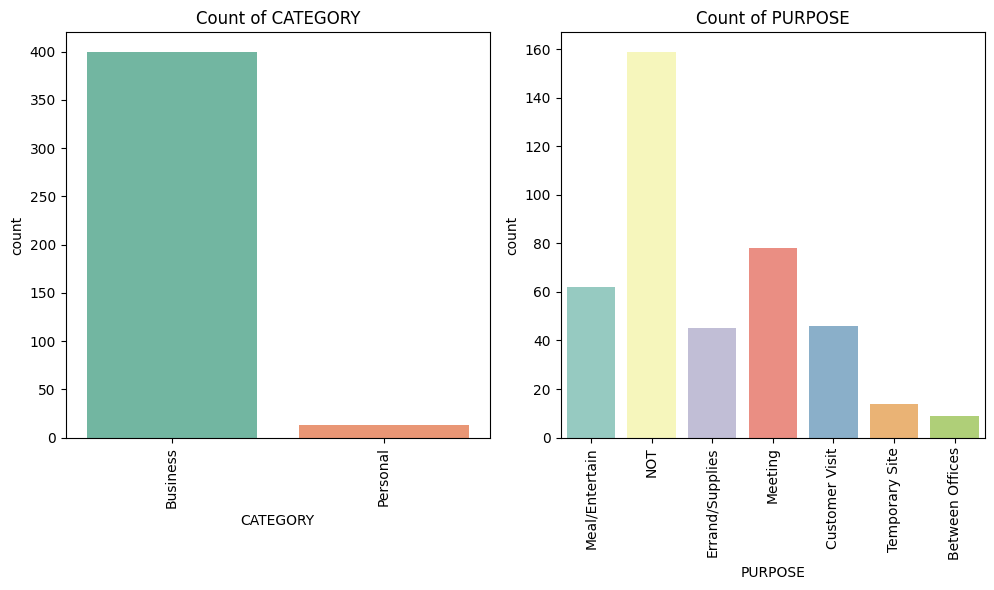

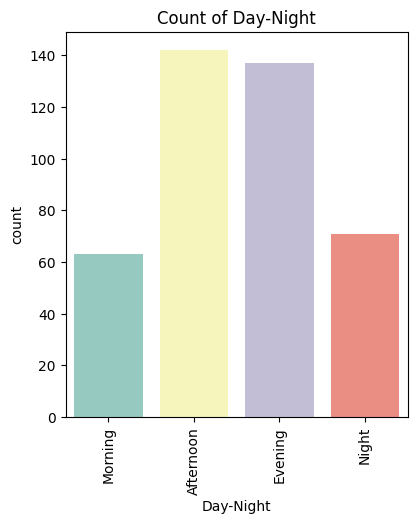

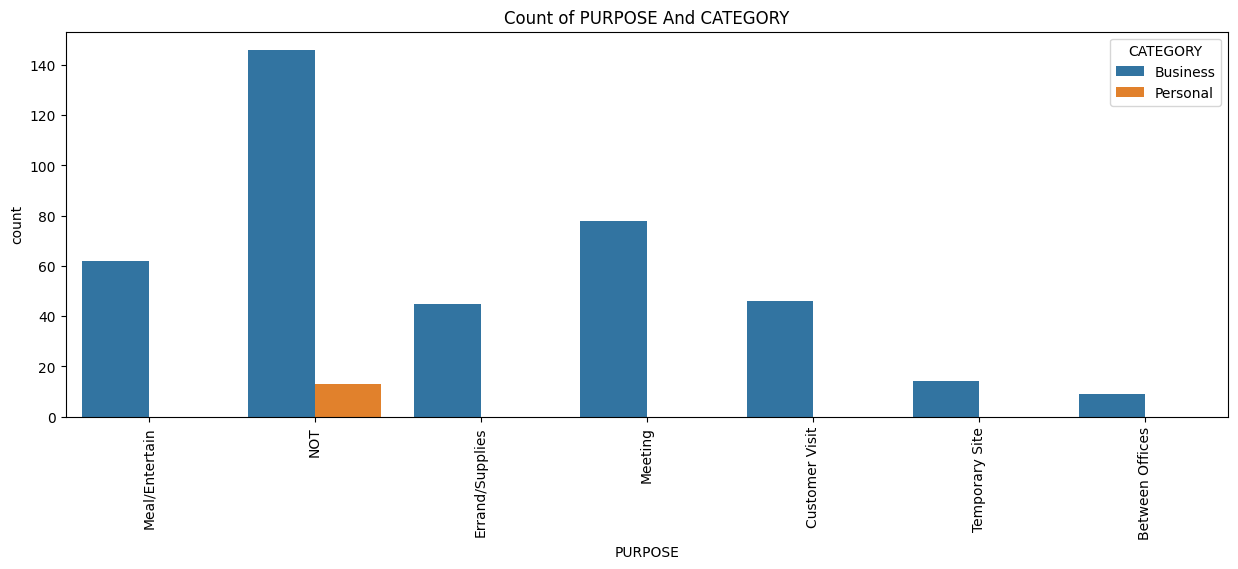

<Figure size 640x480 with 0 Axes>

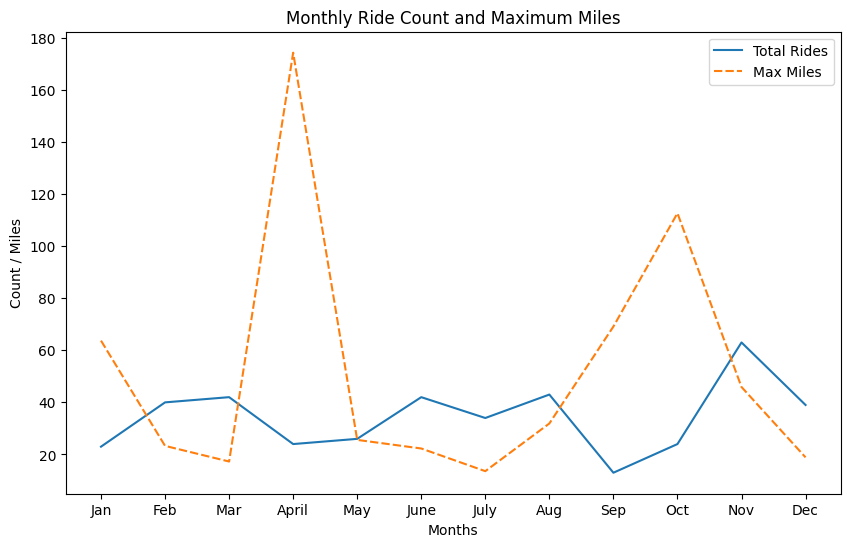

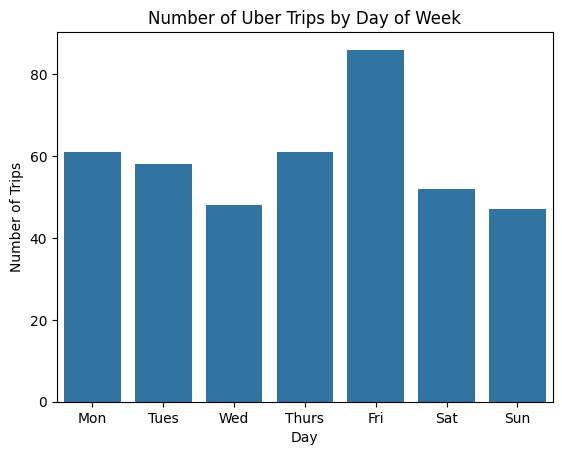

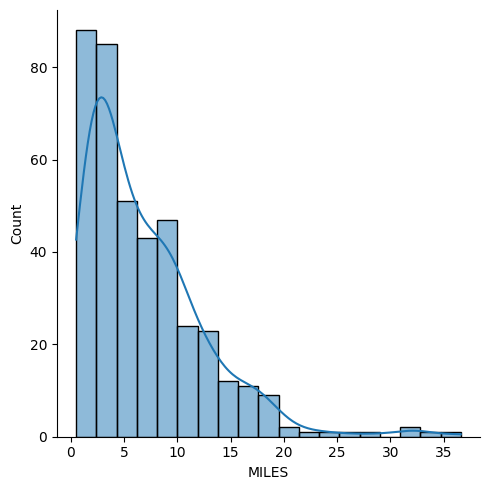

,START_DATE,END_DATE,START,STOP,MILES,Date,Time,Day-Night,CATEGORY_Business,CATEGORY_Personal,PURPOSE_Between Offices,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_NOT,PURPOSE_Temporary Site,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Jan,Wed


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/sangitaGIT011/Myproj/refs/heads/main/UberDataset.csv")
#dataset.head()
#dataset.shape

#dataset.info()

#dataset['PURPOSE'] = dataset['PURPOSE'].fillna("NOT")



dataset.fillna('NOT',inplace=True)
dataset = dataset.dropna()

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                    errors='coerce')


from datetime import datetime

dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing or Split into categories of day and night
dataset['Day-Night'] = pd.cut(x=dataset['Time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values



plt.figure(figsize=(15, 6))

# # First subplot for CATEGORY
plt.subplot(1, 3, 1)
sns.countplot(x='CATEGORY', hue='CATEGORY', data=dataset, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title("Count of CATEGORY")

# Second subplot for PURPOSE
plt.subplot(1, 3, 2)
sns.countplot(x='PURPOSE', hue='PURPOSE', data=dataset, palette='Set3', legend=False)
plt.xticks(rotation=90)
plt.title("Count of PURPOSE")

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.countplot(x='Day-Night', hue='Day-Night', data=dataset, palette='Set3', legend=False)
plt.xticks(rotation=90)
plt.title("Count of Day-Night")

#comparing the two different categories  with the PURPOSE
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.title("Count of PURPOSE And CATEGORY")
plt.show()

# Add spacing between subplots
plt.subplots_adjust(wspace=0.6)  # Try values like 0.4, 0.5, or higher
plt.show()



#from sklearn.preprocessing import OneHotEncoder
#object_cols = ['CATEGORY', 'PURPOSE']
#OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
#OH_cols.index = dataset.index
#OH_cols.columns = OH_encoder.get_feature_names_out()
#df_final = dataset.drop(object_cols, axis=1)
#dataset = pd.concat([df_final, OH_cols], axis=1)




from sklearn.preprocessing import OneHotEncoder


object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)



# Select only numerical columns for correlation calculation



# Remove any rows where START_DATE is not a valid date
dataset = dataset[pd.to_datetime(dataset['START_DATE'], errors='coerce').notna()]

# Convert START_DATE to datetime and extract month
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['MONTH'] = dataset['START_DATE'].dt.month

# Map month number to month name
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
               9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dataset["MONTH"] = dataset["MONTH"].map(month_label)

# Count total rides per month
mon = dataset['MONTH'].value_counts(sort=False)

# Create DataFrame for plotting
df = pd.DataFrame({
    "MONTHS": mon.index,
    "Total Rides": mon.values,
    "Max Miles": dataset.groupby('MONTH', sort=False)['MILES'].max().values
})

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=df.set_index("MONTHS"))
plt.xlabel("Months")
plt.ylabel("Count / Miles")
plt.title("Monthly Ride Count and Maximum Miles")
plt.show()


# Check column names to verify 'START_DATE' exists
##print("Columns:", dataset.columns)

# Convert START_DATE to datetime
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Check for successful conversion
#print("Missing START_DATE values:", dataset['START_DATE'].isna().sum())

# Extract weekday
dataset['DAY'] = dataset['START_DATE'].dt.weekday

# Map to day names
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

# Check that DAY column was created properly
#print("Unique values in DAY:", dataset['DAY'].unique())



# Count trips per day and plot
day_counts = dataset['DAY'].value_counts().reindex(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Number of Uber Trips by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Trips")
plt.show()

#boxplot to check the distribution
#sns.boxplot(dataset['MILES'])

sns.displot(dataset[dataset['MILES'] < 40]['MILES'], kde=True)
plt.show()

dataset.head()